In [1]:
import itertools
import openturns as ot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dependence.tests import func_sum
from dependence.tests.test_functions import func_cum_sum_weight, func_spec
from dependence import ConservativeEstimate
from dependence import quantile_func
from dependence import iterative_vine_minimize
from dependence.dependence_plot import matrix_plot_input, matrix_plot_quantities
from dependence.dependence_plot import plot_iterative_results
from dependence.dependence_plot import set_style_paper

%matplotlib inline
%load_ext autoreload
%autoreload 2

random_state = 12
np.random.seed(random_state)

In [2]:
dim = 11
margins = []
for i in range(dim):
    margins.append(ot.Uniform(0, 1.))
    
margins[0] = ot.Uniform(0, 1.)
alpha = 0.1
q_func = quantile_func(alpha)
families = np.tril(np.ones((dim, dim)), k=1)

In [3]:
n_influencial_pairs = 2
val_influencial = 1.
val_non_influencial = 0.0
corr_dim = int(dim * (dim-1)/2)

all_pairs = np.asarray(list(itertools.combinations(range(dim), 2)))
selected_pairs = all_pairs[np.random.choice(range(corr_dim), size=n_influencial_pairs, replace=False)]
selected_pairs = np.asarray([[0, dim-2], [1, dim-2], [2, dim-2]])
# selected_pairs = all_pairs

power = np.zeros((dim, dim))
for i in range(1, dim):
    for j in range(i):
        if [j, i] in selected_pairs.tolist():
            print([i, j])
            power[i, j] = val_influencial
        else:
            power[i, j] = val_non_influencial
test_func = lambda x: func_cum_sum_weight(x, power)
print(power)

[9, 0]
[9, 1]
[9, 2]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [4]:
n = 30000
quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)
indep_result = quant_estimate.independence(n_input_sample=n, q_func=q_func, random_state=random_state)
print(indep_result.quantity)

3.6642255623937565


In [5]:
algorithm_parameters = {
    "n_input_sample": 2000,
    "n_dep_param_init": 10,
    "max_n_pairs": 4,
    "grid_type": 'vertices',
    "q_func": q_func,
    "delta": 0.1,
    "n_add_pairs": 1,
    "n_remove_pairs": 0,
    "adapt_vine_structure": True,
    "with_bootstrap": False,
    "verbose": True,
    "iterative_save": False,
    "iterative_load": False,
    "load_input_samples": False,
    "keep_input_samples": True
}

quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)

iterative_results = iterative_vine_minimize(estimate_object=quant_estimate, **algorithm_parameters)

n=1000. Worst quantile of [(1, 0)] at 3.5331324220892055
n=1000. Worst quantile of [(2, 0)] at 3.2299335175929267
n=1000. Worst quantile of [(2, 1)] at 3.137913973982039
n=1000. Worst quantile of [(3, 0)] at 3.57961593175833
n=1000. Worst quantile of [(3, 1)] at 3.4526632880349792
n=1000. Worst quantile of [(3, 2)] at 3.595911799895477
n=1000. Worst quantile of [(4, 0)] at 3.623211730440386
n=1000. Worst quantile of [(4, 1)] at 3.6153632839879033
n=1000. Worst quantile of [(4, 2)] at 3.546685582320432
n=1000. Worst quantile of [(4, 3)] at 3.546622534976465
n=1000. Worst quantile of [(5, 0)] at 3.54835143548676
n=1000. Worst quantile of [(5, 1)] at 3.6337044455129535
n=1000. Worst quantile of [(5, 2)] at 3.5607412569957915
n=1000. Worst quantile of [(5, 3)] at 3.657958199495497
n=1000. Worst quantile of [(5, 4)] at 3.697558807825415
n=1000. Worst quantile of [(6, 0)] at 3.492616956594038
n=1000. Worst quantile of [(6, 1)] at 3.612020045113228
n=1000. Worst quantile of [(6, 2)] at 3.5647

n=1000. Worst quantile of [(9, 2), (9, 0), (6, 5)] at 2.2354052980730765
n=1000. Worst quantile of [(9, 2), (9, 0), (7, 0)] at 2.3051348201043336
n=1000. Worst quantile of [(9, 2), (9, 0), (7, 1)] at 2.3306184503034286
n=1000. Worst quantile of [(9, 2), (9, 0), (7, 2)] at 2.4098563550884946
n=1000. Worst quantile of [(9, 2), (9, 0), (7, 3)] at 2.2262911907113807
n=1000. Worst quantile of [(9, 2), (9, 0), (7, 4)] at 2.31869492042032
n=1000. Worst quantile of [(9, 2), (9, 0), (7, 5)] at 2.1831632408657122
n=1000. Worst quantile of [(9, 2), (9, 0), (7, 6)] at 2.296512687480301
n=1000. Worst quantile of [(9, 2), (9, 0), (8, 0)] at 2.2189854891689484
n=1000. Worst quantile of [(9, 2), (9, 0), (8, 1)] at 2.3382208956041795
n=1000. Worst quantile of [(9, 2), (9, 0), (8, 2)] at 2.8402321856917534
n=1000. Worst quantile of [(9, 2), (9, 0), (8, 3)] at 2.3016311544004244
n=1000. Worst quantile of [(9, 2), (9, 0), (8, 4)] at 2.235069107597012
n=1000. Worst quantile of [(9, 2), (9, 0), (8, 5)] at 2

In [6]:
K = 1500
n = 10000

In [7]:
grid_type = 'lhs'
grid_result_lhs = quant_estimate.gridsearch(K, n, q_func=q_func, grid_type='lhs', keep_input_samples=True)
print('Cost: {0}, \nMin quantile: {1}\nMean Min Kendall: {2}'.format(K*n, grid_result_lhs.min_result.quantity, np.mean(grid_result_lhs.min_result.kendall_tau)))

Cost: 10000000, 
Min quantile: 1.7533352199454768
Mean Min Kendall: 0.11547000000000002


In [8]:
grid_result_vertices = quant_estimate.gridsearch(K, n, q_func=q_func, grid_type='vertices', keep_input_samples=True)
print('Cost: {0}, \nMin quantile: {1}\nMean Min Kendall: {2}'.format(K*n, grid_result_vertices.min_result.quantity, np.mean(grid_result_vertices.min_result.kendall_tau)))

Cost: 10000000, 
Min quantile: 1.6837098603067162
Mean Min Kendall: 0.12599999999999997


In [9]:
kendalls_lhs = grid_result_lhs.kendalls
kendalls_vertices = grid_result_vertices.kendalls
dev_kendall_lhs = abs(kendalls_lhs).mean(axis=1)
dev_kendall_vertices = abs(kendalls_vertices).mean(axis=1)
quantities_lhs = grid_result_lhs.quantities
quantities_vertices = grid_result_vertices.quantities
quantity_indep = indep_result.quantity

In [10]:
min_kendall_lhs = grid_result_lhs.min_result.kendall_tau
min_kendall_vertices = grid_result_vertices.min_result.kendall_tau
min_dev_kendall_lhs = np.abs(min_kendall_lhs).mean()
min_dev_kendall_vertices = np.abs(min_kendall_vertices).mean()
min_quantity_lhs = grid_result_lhs.min_result.quantity
min_quantity_vertices = grid_result_vertices.min_result.quantity

In [11]:
min_dev_kendalls_iterative = []
min_quantities_iterative = []
min_results_iterative = []
for results_i in iterative_results:
    min_quantity_i = np.inf
    min_dev_kendalls_i = None
    min_result_i = None
    for key in results_i:
        min_quantity = results_i[key].min_quantity
        if min_quantity < min_quantity_i:
            min_quantity_i = min_quantity
            min_dev_kendalls_i = np.mean(results_i[key].min_result.kendall_tau)
            min_result_i = results_i[key].min_result
    min_quantities_iterative.append(min_quantity_i)
    min_dev_kendalls_iterative.append(min_dev_kendalls_i)
    min_results_iterative.append(min_result_i)

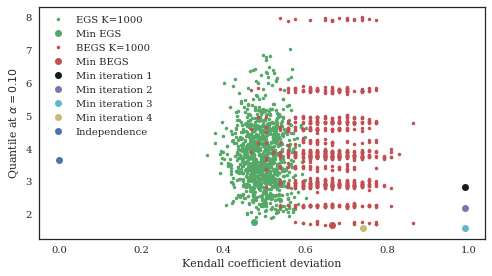

In [12]:
set_style_paper()
colors = ['k', 'm', 'c', 'y']
fig, ax = plt.subplots(figsize=(7, 4))    
ax.plot(dev_kendall_lhs, quantities_lhs, 'g.', label='EGS K=%d' % (K))
ax.plot(min_dev_kendall_lhs, min_quantity_lhs, 'go', label='Min EGS')
ax.plot(dev_kendall_vertices, quantities_vertices, 'r.', label='BEGS K=%d' % (min(K, 3**dim-1)))
ax.plot(min_dev_kendall_vertices, min_quantity_vertices, 'ro', label='Min BEGS')
for i in range(len(min_dev_kendalls_iterative)):
    ax.plot(min_dev_kendalls_iterative[i], min_quantities_iterative[i], 'o', color=colors[i], label='Min iteration %d' % (i+1))
ax.plot(0., quantity_indep, 'bo', label='Independence')
ax.legend(loc=0)
ax.set_xlabel('Kendall coefficient deviation')
ax.set_ylabel('Quantile at $\\alpha = %.2f$' % (alpha))
fig.tight_layout()
fig.savefig('./output/few-pairs/multidim_test_quantile_dim_%d_K_%d.pdf' % (dim, K))

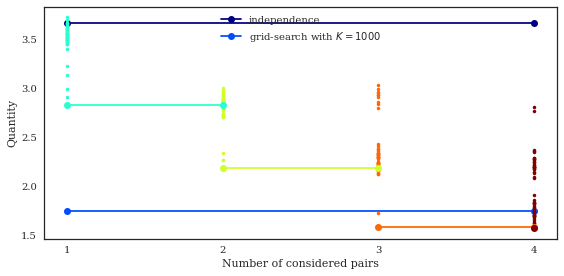

In [13]:
plot_iterative_results(iterative_results, indep_result=indep_result, grid_results=grid_result_lhs, q_func=q_func)
plt.savefig('./output/few-pairs/iterative_result_with_grid_%d.pdf' % (K))

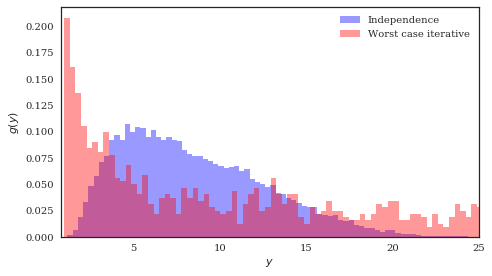

In [59]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.distplot(indep_result.output_sample, norm_hist=True, kde=False, bins=80, label='Independence', ax=ax, color='blue')
sns.distplot(min_results_iterative[3].output_sample, norm_hist=True, kde=False, bins=80, label='Worst case iterative', ax=ax, color='red')
ax.legend(loc=0)
ax.set_xlim(0.8, 25)
ax.set_xlabel('$y$')
ax.set_ylabel('$g(y)$')
fig.tight_layout()
fig.savefig('output/few-pairs/histograms.pdf')

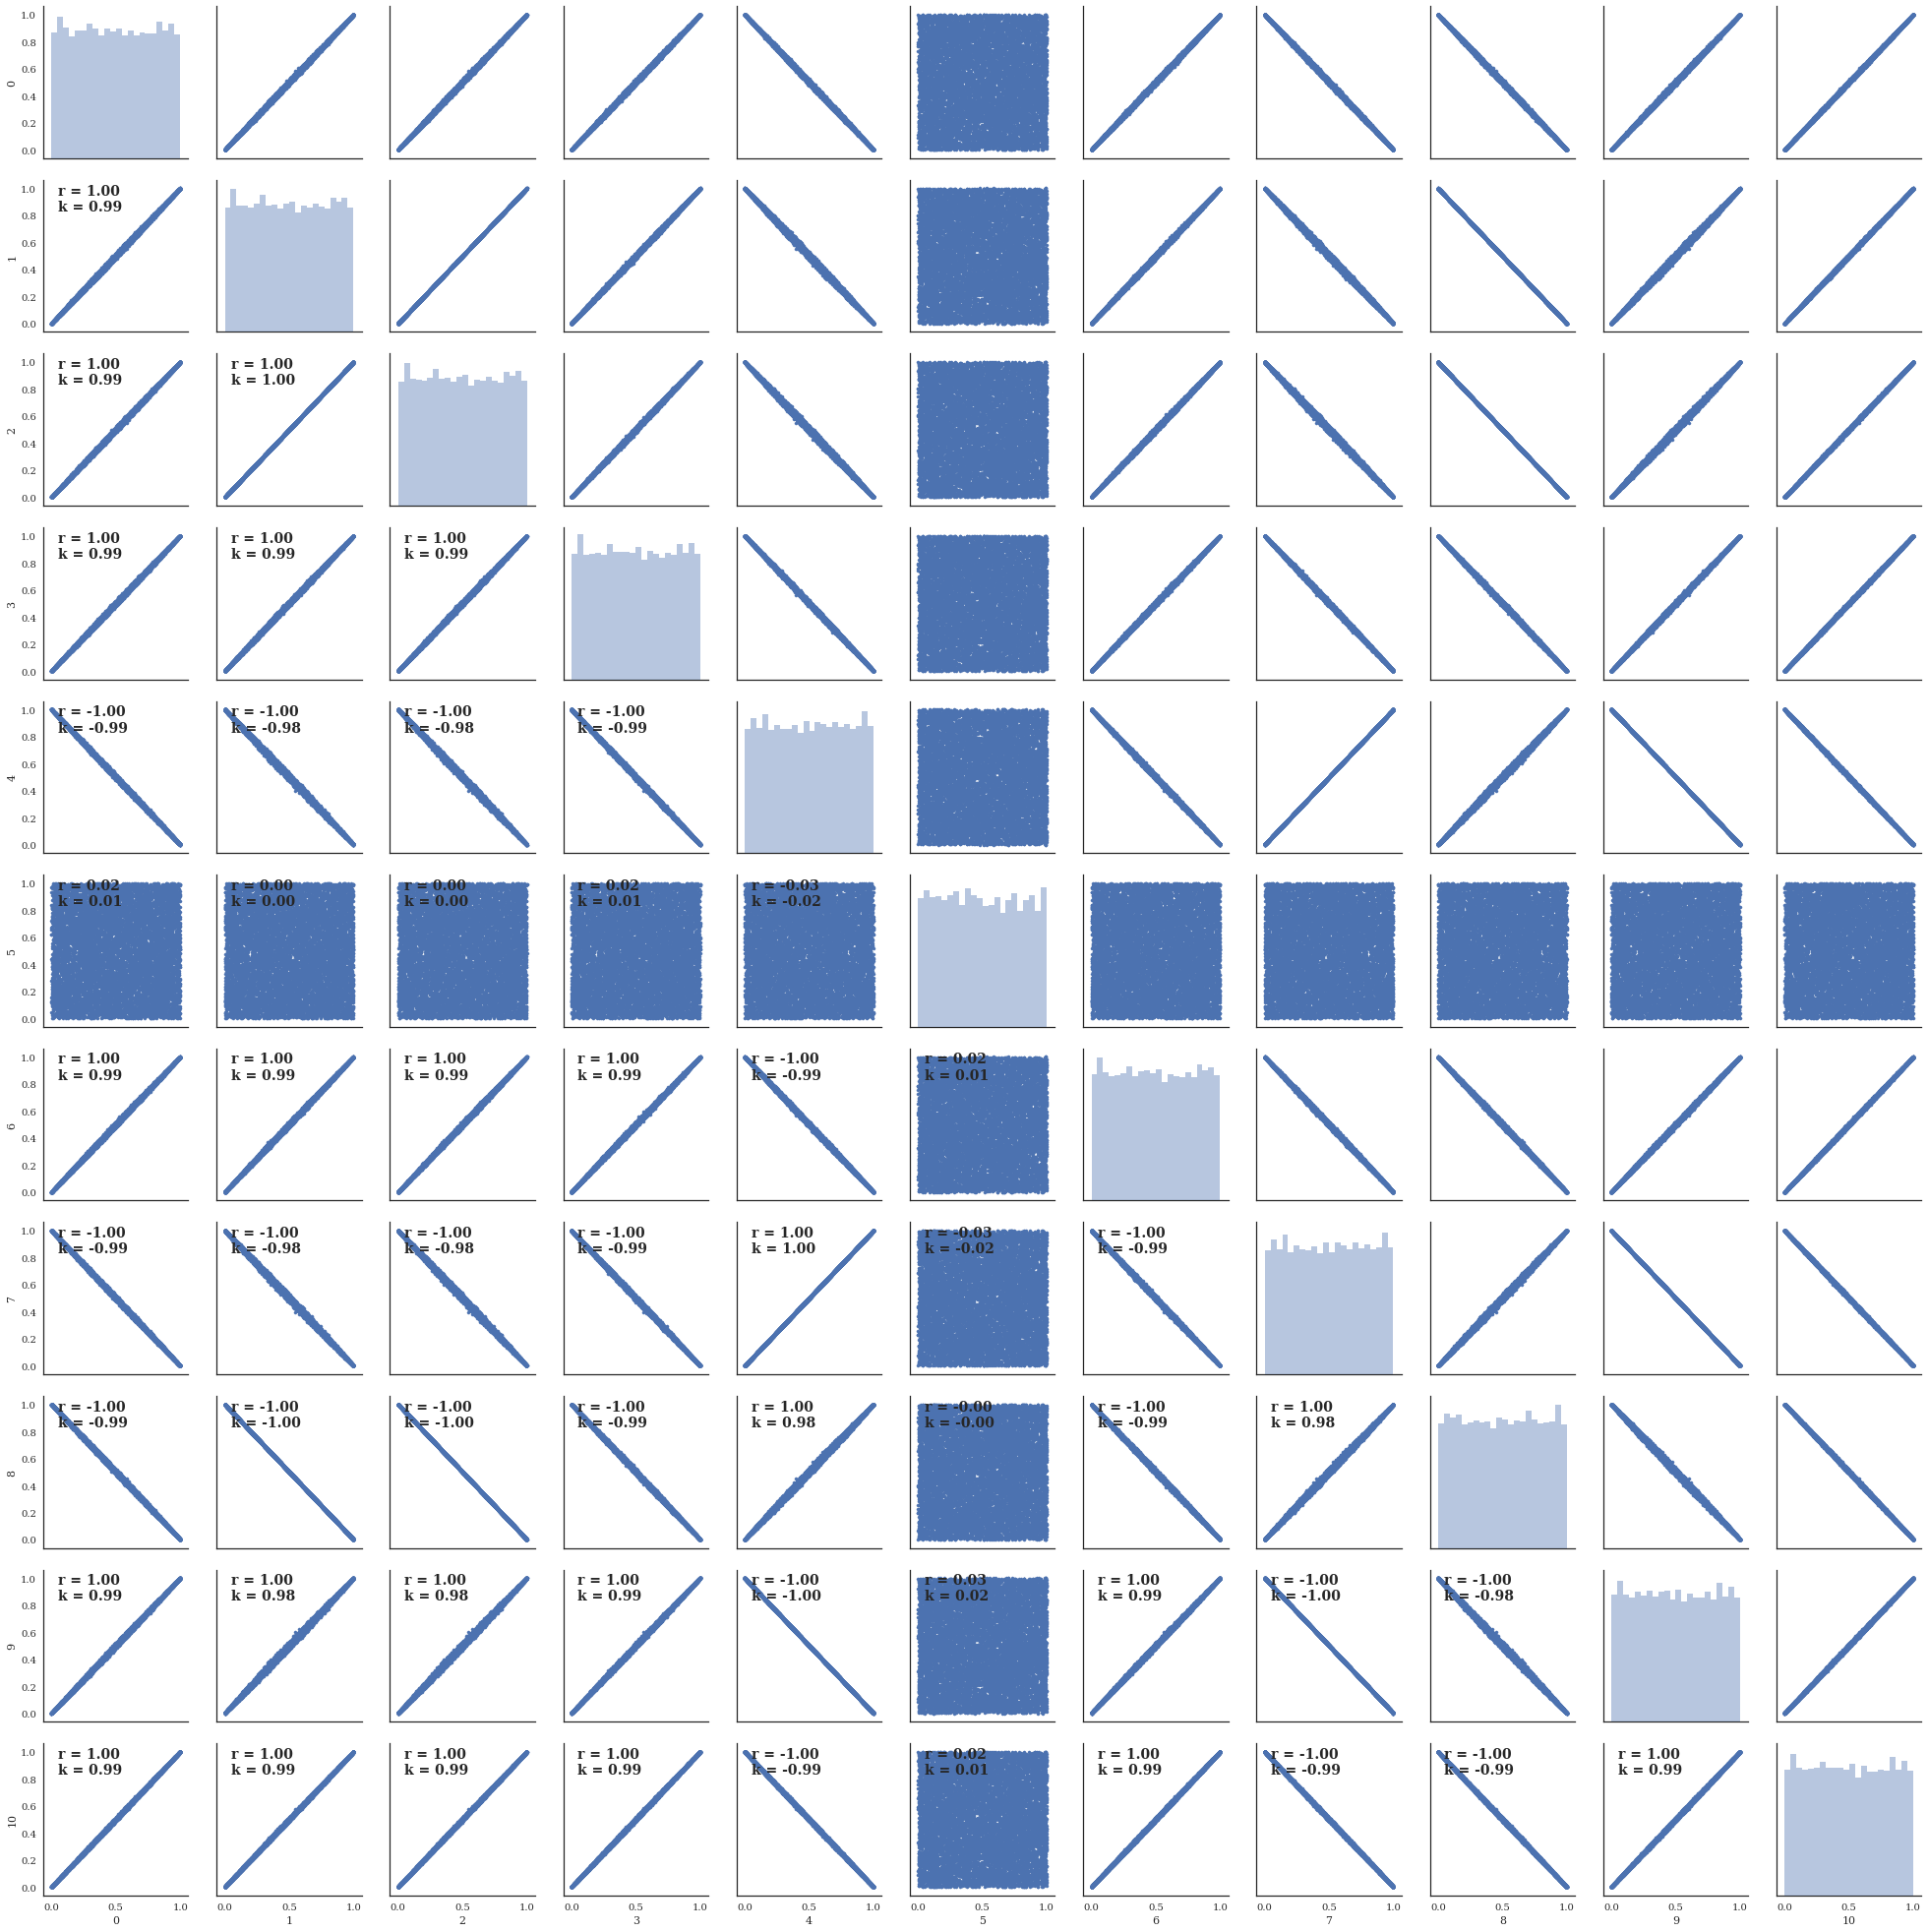

In [25]:
matrix_plot_input(grid_result_vertices.min_result)

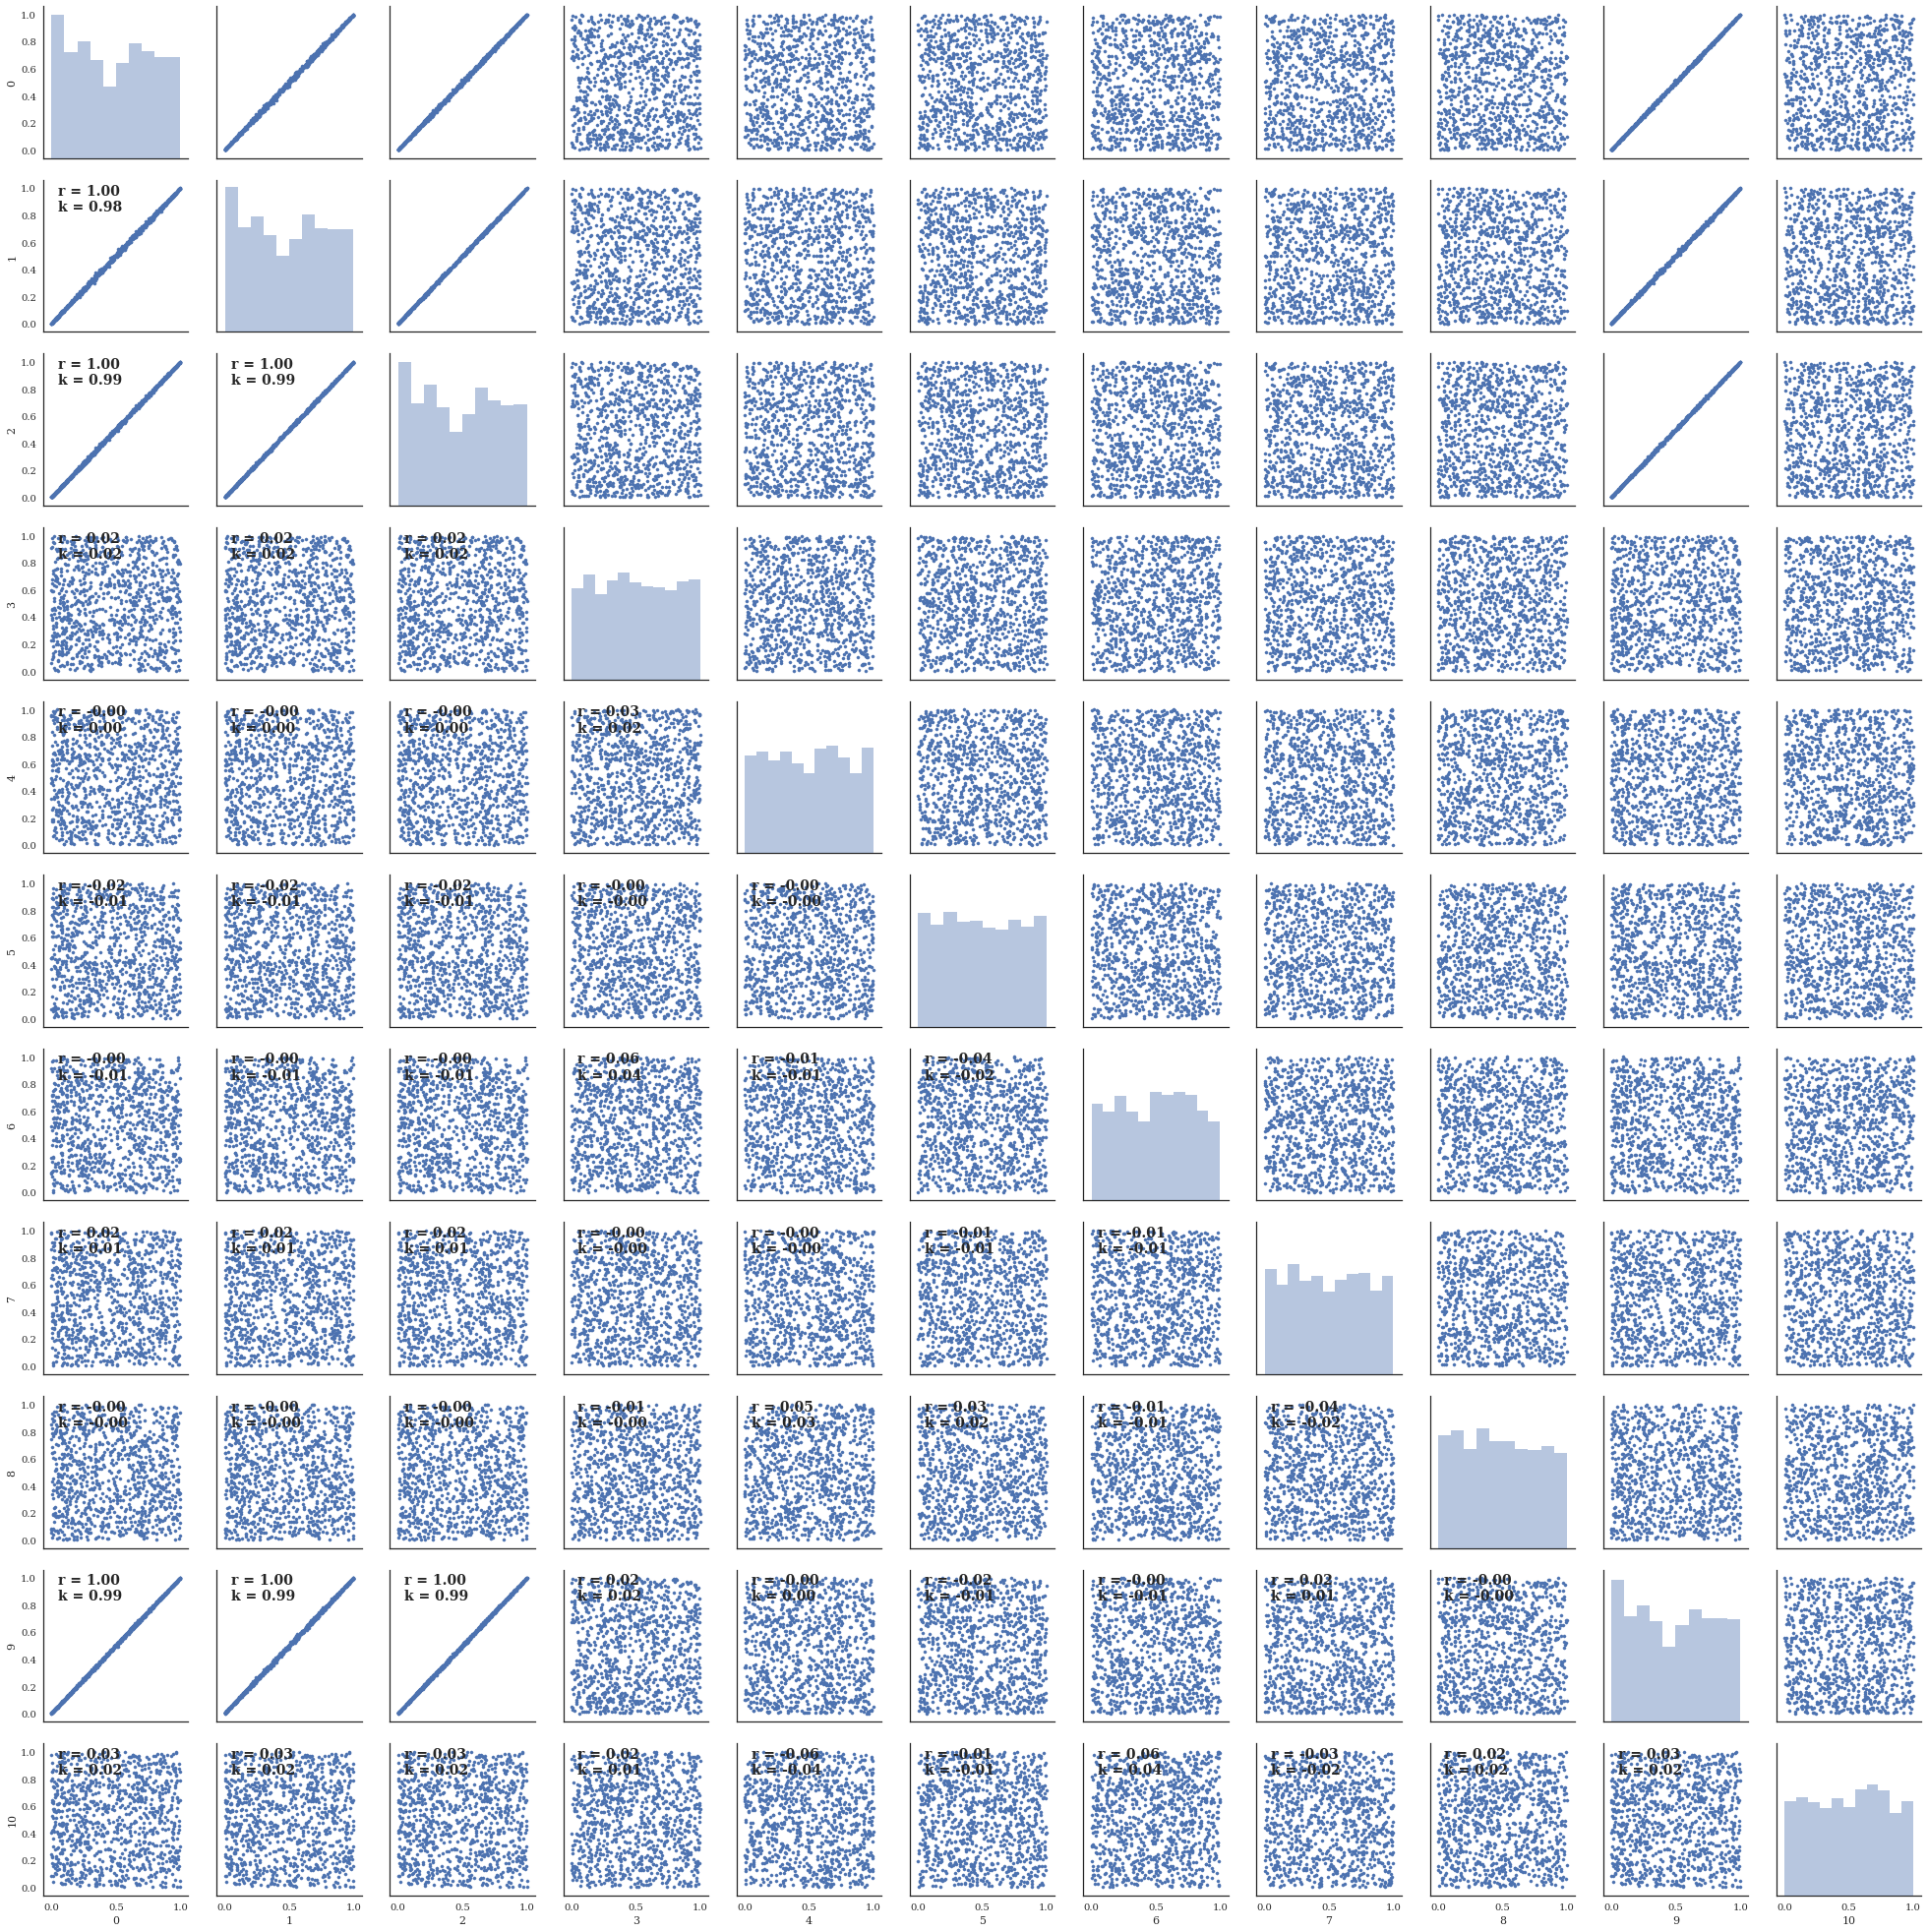

In [27]:
matrix_plot_input(min_results_iterative[-1])

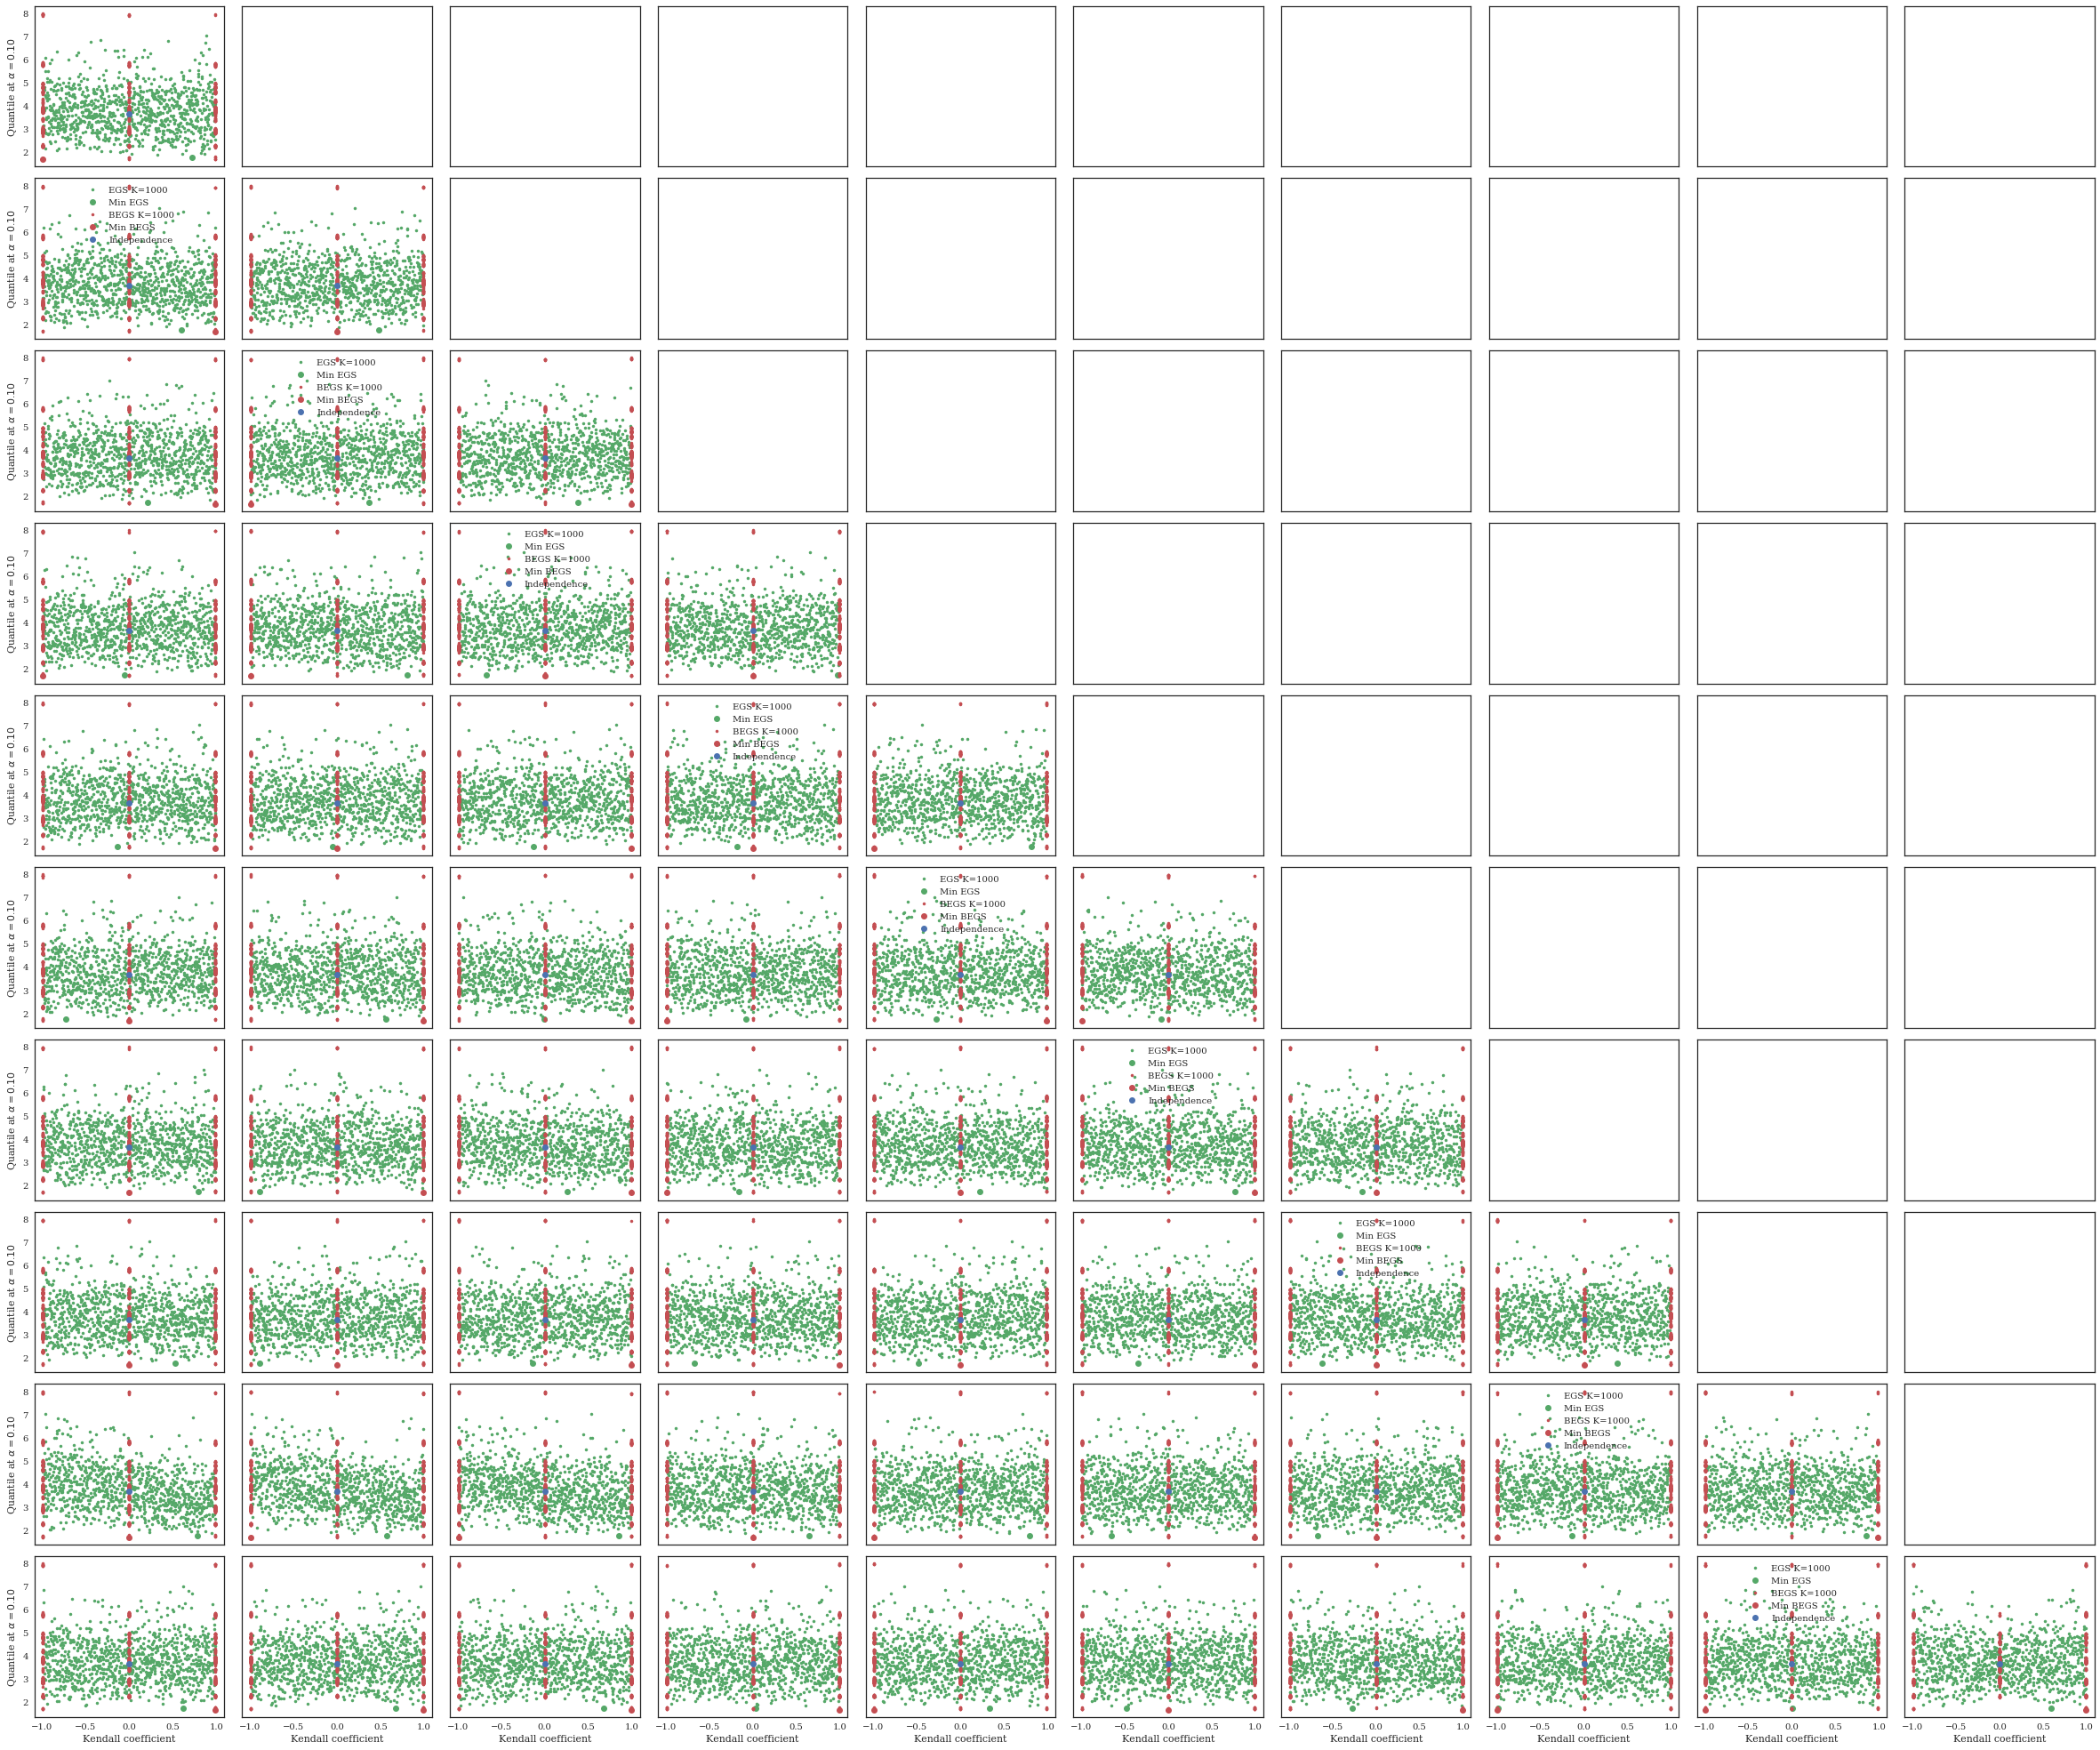

In [17]:
fig, axes = plt.subplots(dim-1, dim-1, figsize=(3*dim, 2.5*dim), sharex=True, sharey=True)

k = 0
for i in range(dim-1):
    for j in range(i+1):
        ax = axes[i, j] if dim > 2 else axes
        ax.plot(kendalls_lhs[:, k], quantities_lhs, 'g.', label='EGS K=%d' % (K))
        ax.plot(min_kendall_lhs[k], min_quantity_lhs, 'go', label='Min EGS')
        ax.plot(kendalls_vertices[:, k], quantities_vertices, 'r.', label='BEGS K=%d' % (min(K, 3**dim-1)))
        ax.plot(min_kendall_vertices[k], min_quantity_vertices, 'ro', label='Min BEGS')
        ax.plot(0., quantity_indep, 'bo', label='Independence')
        k += 1
        if i == dim-2:
            ax.set_xlabel('Kendall coefficient')
        if j == 0:
            ax.set_ylabel('Quantile at $\\alpha = %.2f$' % (alpha))
        if i == j+1:
            ax.legend(loc=0)
            
fig.tight_layout()
fig.savefig('./output/few-pairs/matrix_plot_multidim_test_quantile_dim_%d_K_%d.pdf' % (dim, K))